<a href="https://colab.research.google.com/github/rachel1234561/labs/blob/main/Copy_of_04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
!git clone https://github.com/DS3001/labs

Cloning into 'labs'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 80 (delta 28), reused 30 (delta 18), pack-reused 31 (from 1)
Receiving objects: 100% (80/80), 20.54 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Clean the data and perform some EDA and visualization to get to know the data set.

In [3]:
df_cars = pd.read_csv("/content/labs/04_hedonic_pricing/cars_hw.csv")
df_cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
df_cars.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


In [26]:
print(df_cars.dtypes)

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object


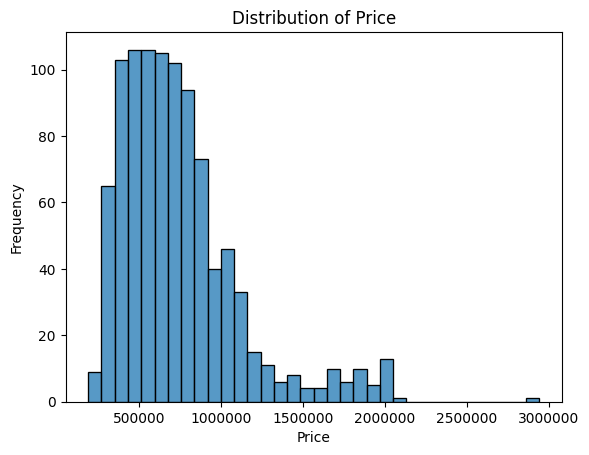

In [6]:
# Histogram of Price
sns.histplot(df_cars['Price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Remove scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

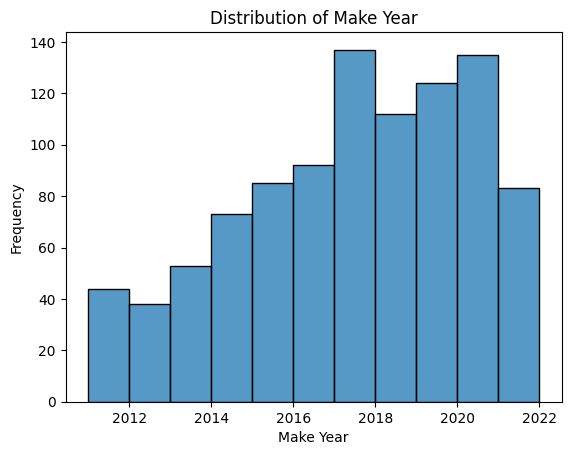

In [27]:
# Histogram of Price
sns.histplot(df_cars['Make_Year'], bins = 11)
plt.title('Distribution of Make Year')
plt.xlabel('Make Year')
plt.ylabel('Frequency')
# Remove scientific notation
plt.ticklabel_format()
plt.show()

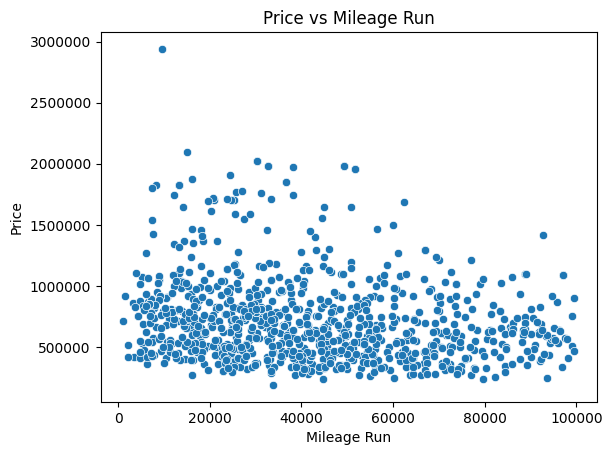

In [ ]:
sns.scatterplot(data=df_cars,y='Price',x='Mileage_Run')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Price vs Mileage Run')
plt.xlabel('Mileage Run')
plt.ylabel('Price')
plt.show()

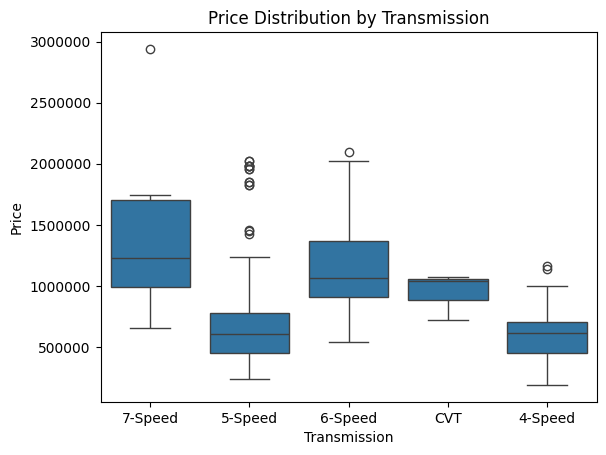

In [ ]:
# Box plot for Transmission vs Price
sns.boxplot(data=df_cars, x='Transmission', y='Price')
plt.title('Price Distribution by Transmission')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [49]:
#transform Fuel_Type to dummy
Fuel_Type_dummy = pd.get_dummies(df_cars['Fuel_Type'], prefix='Fuel_Type', drop_first=False)  # Create dummy variables with prefix

# Concatenate the dummy variables to the original DataFrame
df_cars2 = pd.concat([df_cars, Fuel_Type_dummy], axis=1)

In [51]:
#transform Fuel_Type to dummy
Body_Type_dummy = pd.get_dummies(df_cars['Body_Type'], prefix='Body_Type', drop_first=False)  # Create dummy variables with prefix

# Concatenate the dummy variables to the original DataFrame
df_cars2 = pd.concat([df_cars2, Body_Type_dummy], axis=1)

In [52]:
#transform Fuel_Type to dummy
Transmission_dummy = pd.get_dummies(df_cars['Transmission'], prefix='Transmission', drop_first=False)  # Create dummy variables with prefix

# Concatenate the dummy variables to the original DataFrame
df_cars2 = pd.concat([df_cars2, Transmission_dummy], axis=1)

In [53]:
df_cars2.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,...,Body_Type_crossover,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,...,False,False,False,True,False,False,False,False,True,False
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,...,True,False,False,False,False,False,True,False,False,False
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,...,False,False,False,False,True,False,True,False,False,False
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,...,False,True,False,False,False,False,True,False,False,False
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,...,False,True,False,False,False,False,True,False,False,False


3. Implement an 80/20 train-test split. Put the test data aside.

In [60]:
y = df_cars2['Price']
X = df_cars2.loc[:,['Make_Year', 'Mileage_Run','Body_Type'] ]
X = pd.get_dummies(X, columns=['Body_Type'], drop_first=False)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets. Which of your models does the best?

In [62]:
#model with make year, Mileage, and body type
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the linear model (Drop the intercept of the regression with the option LinearRegression(fit_intercept=False))
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('Train R-squared: ', reg.score(X_train, y_train)) # R squared measure
y_hat = reg.predict(X_train)
rmse = np.sqrt(np.mean( (y_train - y_hat)**2 ))
print('Train RMSE: ', rmse) # R2
print('Test R-squared: ', reg.score(X_test, y_test)) # R squared measure
y_hat2 = reg.predict(X_test)
rmse2 = np.sqrt(np.mean( (y_test - y_hat2)**2 ))
print('Test RMSE: ', rmse2) # R2
results

Train R-squared:  0.6045854130522758
Train RMSE:  230301.05753677827
Test R-squared:  0.64435677729574
Test RMSE:  220982.10283221406


,variable,coefficient
0,Make_Year,5.094545e+04
1,Mileage_Run,-1.227636e-01
2,Body_Type_crossover,-1.020739e+08
3,Body_Type_hatchback,-1.021923e+08
4,Body_Type_muv,-1.021729e+08
5,Body_Type_sedan,-1.019312e+08
6,Body_Type_suv,-1.016591e+08


In [63]:
#model with Fuel_Type and Mileage
y = df_cars2['Price']
X = df_cars2.loc[:,['Fuel_Type', 'Mileage_Run'] ]
X = pd.get_dummies(X, columns=['Fuel_Type'], drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

reg = LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

y_hat = reg.predict(X_train)
print('Train R-squared: ', reg.score(X_train,y_train))
rmse = np.sqrt( np.mean( (y_train - y_hat)**2 ))
print('Train RMSE: ', rmse)
y_hat2 = reg.predict(X_test)
print('Test R-squared: ', reg.score(X_test,y_test))
rmse2 = np.sqrt( np.mean( (y_test - y_hat2)**2 ))
print('Test RMSE: ', rmse2)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Train R-squared:  0.2282414804863645
Train RMSE:  321743.88769757
Test R-squared:  0.279347393515768
Test RMSE:  314566.7492244104


,variable,coefficient
0,Mileage_Run,-5.059149e+00
1,Fuel_Type_diesel,1.303532e+06
2,Fuel_Type_petrol,8.642549e+05
3,Fuel_Type_petrol+cng,7.228054e+05


My model with make year, Mileage, and body type did the best as it has a an r-squared of 0.6045854130522758 with the training data and 0.64435677729574 with the test data compared to the other model with Fuel_Type and Mileage which has an r-squared of 0.2282414804863645 with the training data and 0.279347393515768 with the test data

5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and  𝑅2  on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(df_cars2[['Make_Year', 'Mileage_Run']]) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X1 = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

## other variables:
X2 = df_cars2['Body_Type']
X3 = df_cars2['Price']

## Concatenate:
df_cars3 = pd.concat([X1,X2,X3],axis=1) # Concatenate engineered features
df_cars3.head()


,Make_Year,Mileage_Run,Make_Year^2,Make_Year Mileage_Run,Mileage_Run^2,Body_Type,Price
0,2017.0,44611.0,4068289.0,89980387.0,1.990141e+09,sedan,657000
1,2016.0,20305.0,4064256.0,40934880.0,4.122930e+08,crossover,682000
2,2019.0,29540.0,4076361.0,59641260.0,8.726116e+08,suv,793000
3,2017.0,35680.0,4068289.0,71966560.0,1.273062e+09,hatchback,414000
4,2017.0,25126.0,4068289.0,50679142.0,6.313159e+08,hatchback,515000


In [75]:
#model with make_year, 	Make_Year^2, Mileage, Mileage_Run^2, Make_Year Mileage_Run, and body type
y = df_cars3['Price']
X = df_cars3.loc[:,['Make_Year', 'Make_Year^2', 'Mileage_Run', 'Mileage_Run^2', 'Make_Year Mileage_Run', 'Body_Type'] ]
X = pd.get_dummies(X, columns=['Body_Type'], drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the linear model (Drop the intercept of the regression with the option LinearRegression(fit_intercept=False))
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('Train R-squared: ', reg.score(X_train, y_train)) # R squared measure
y_hat = reg.predict(X_train)
rmse = np.sqrt(np.mean( (y_train - y_hat)**2 ))
print('Train RMSE: ', rmse) # R2
print('Test R-squared: ', reg.score(X_test, y_test)) # R squared measure
y_hat2 = reg.predict(X_test)
rmse2 = np.sqrt(np.mean( (y_test - y_hat2)**2 ))
print('Test RMSE: ', rmse2) # R2
results

Train R-squared:  0.6105699092580745
Train RMSE:  228551.63996362998
Test R-squared:  0.649356279061066
Test RMSE:  219423.36278727534


,variable,coefficient
0,Make_Year,-54824.469481
1,Make_Year^2,27.343326
2,Mileage_Run,26.348537
3,Mileage_Run^2,-0.000048
4,Make_Year Mileage_Run,-0.010728
5,Body_Type_crossover,-67805.451623
6,Body_Type_hatchback,-184195.772083
7,Body_Type_muv,-169421.065536
8,Body_Type_sedan,76805.903170
9,Body_Type_suv,344562.156950


This more complext model has a sligtly higher r-squared compared to the similar simpler model for both test (0.649356279061066 vs 0.64435677729574) and (train 0.6105699092580745 vs 0.6045854130522758) but only by a very small amount.

6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

Overall I feel that the best model was the first one I made using make year, Mileage, and body type as it seems to not be over or under fit like the other models.

My more complext model that included interactions and higher powers was defintely over fit, and this kindof makese sense because I really have no reason to think that the variables I chose to use (make year and mielage) would be more explanatory at a higher power, particularly because a car that has any mielage on it or that was not made in the past few years (i.e. that is not new) probably costs considerable less than a new car. My linear model using fuel type and mielage to predict price was not very accurate, and was likly underfit and not using enough explanatory variables, however this may largley have to do with the model type as it is possible that these variables may be more useful in a model that implements clustering or that is non-linear.